<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


## Assignment: Exploring and Preparing Data


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage.

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans.


## Objectives

Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

*   Exploratory Data Analysis
*   Preparing Data  Feature Engineering


### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab


In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [2]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

<ipython-input-2-cde6ab162d36>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Exploratory Data Analysis


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [3]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(dataset_part_2_csv)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass also appears to be a factor; even with more massive payloads, the first stage often returns successfully.


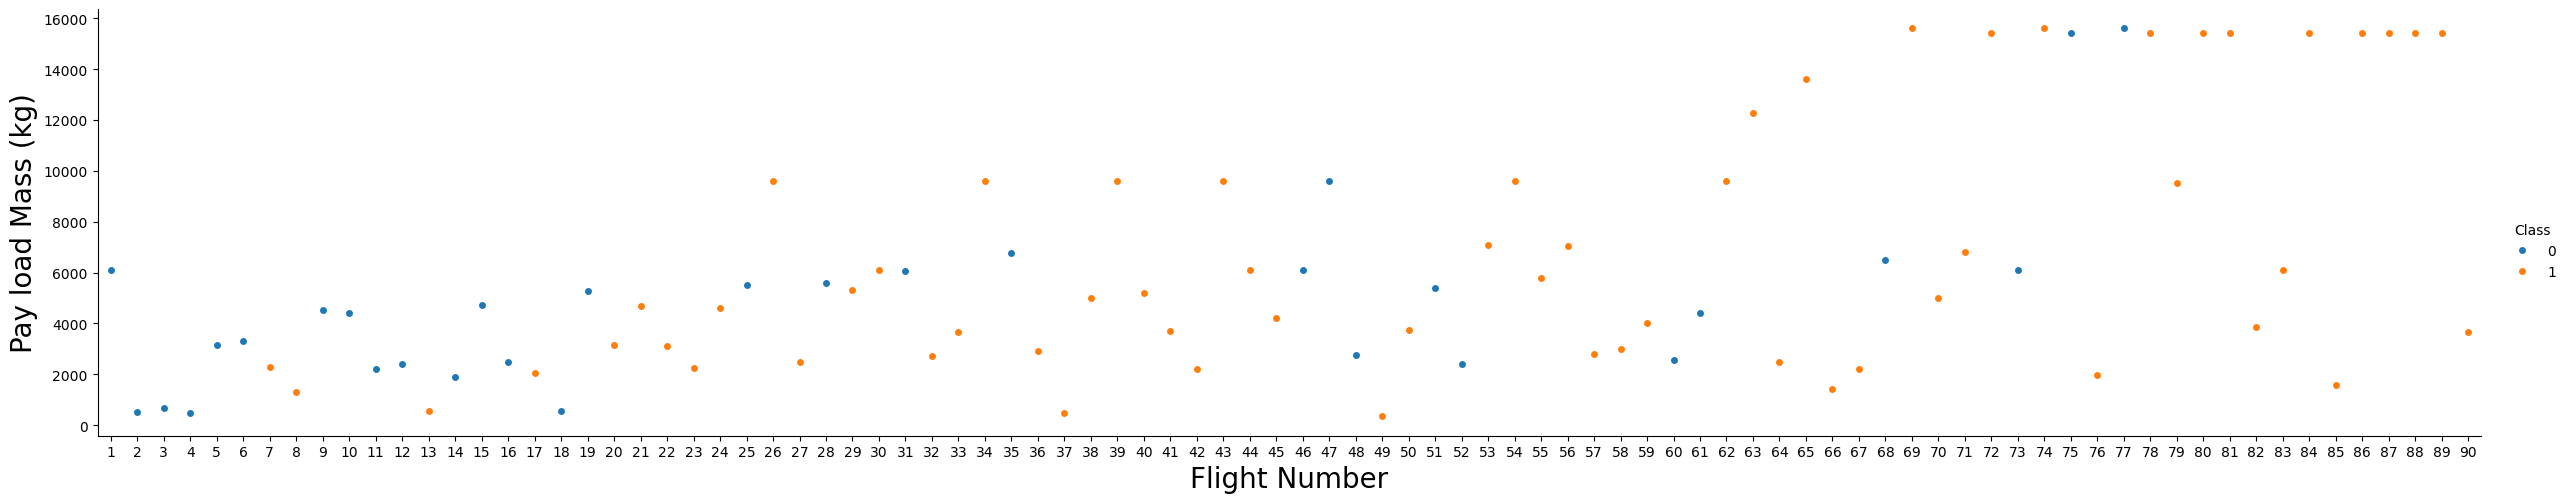

In [4]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Next, let's drill down to each site visualize its detailed launch records.


### TASK 1: Visualize the relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


🎯 TASK 1: Using catplot() as specified
------------------------------------------------------------
Binary columns found: ['GridFins', 'Reused', 'Legs', 'Class']
Using 'GridFins' as 'class' column


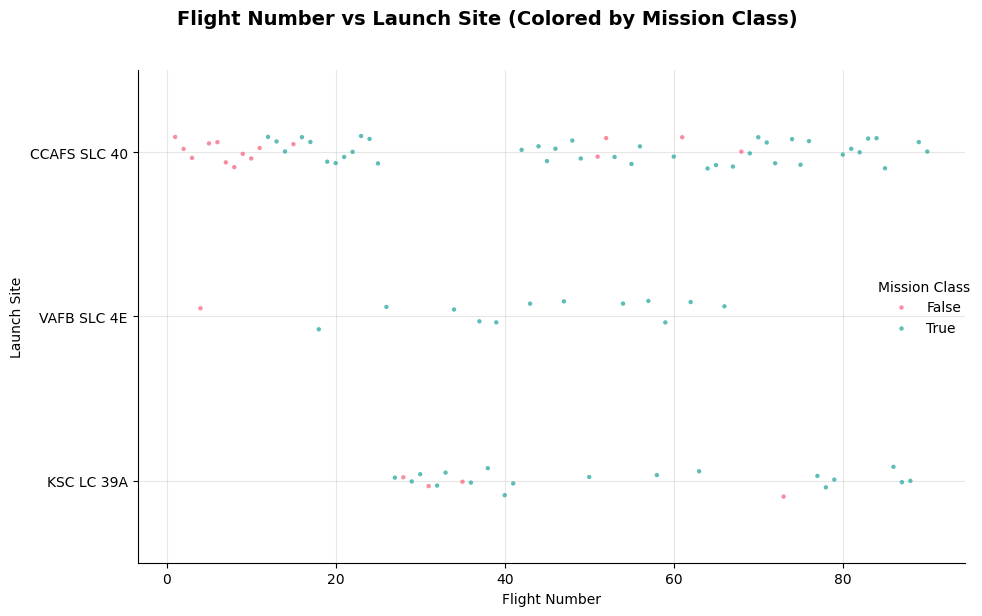


📈 Different catplot visualizations:
--------------------------------------------------

Creating strip plot...


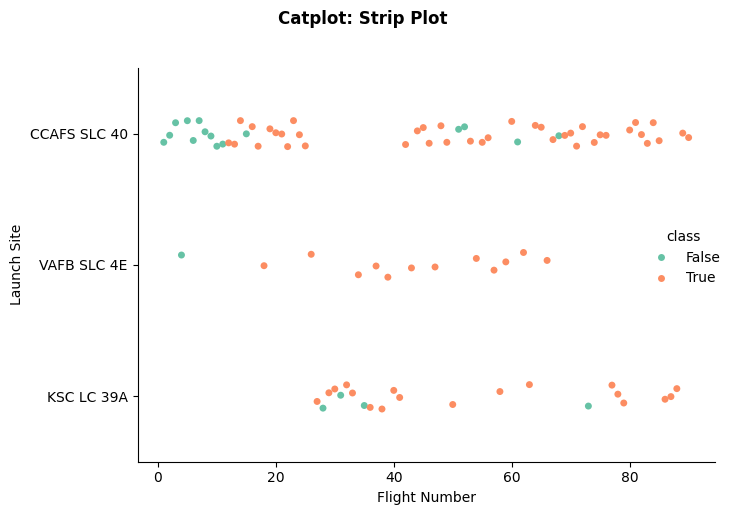


Creating swarm plot...


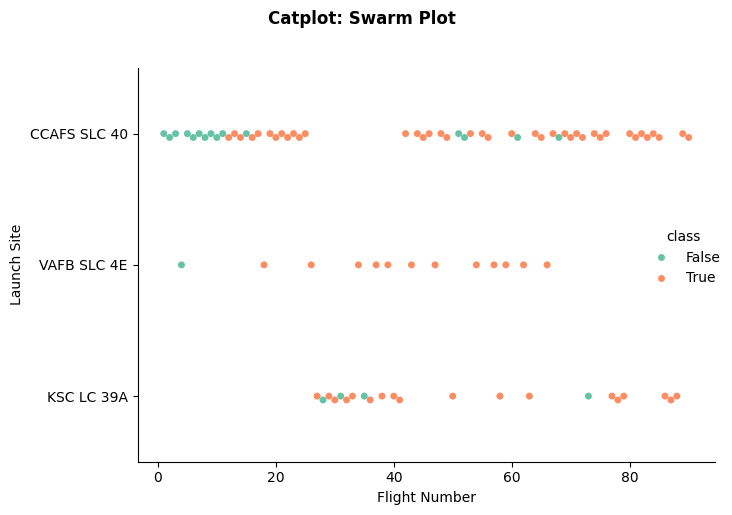


Creating box plot...


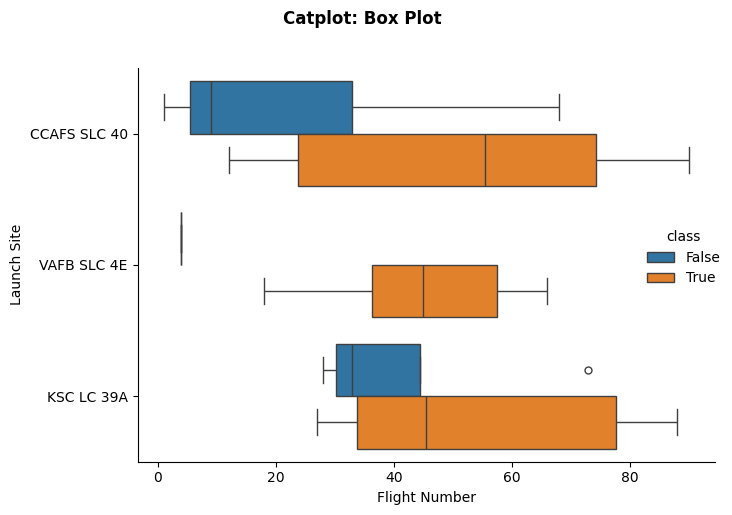


Creating violin plot...


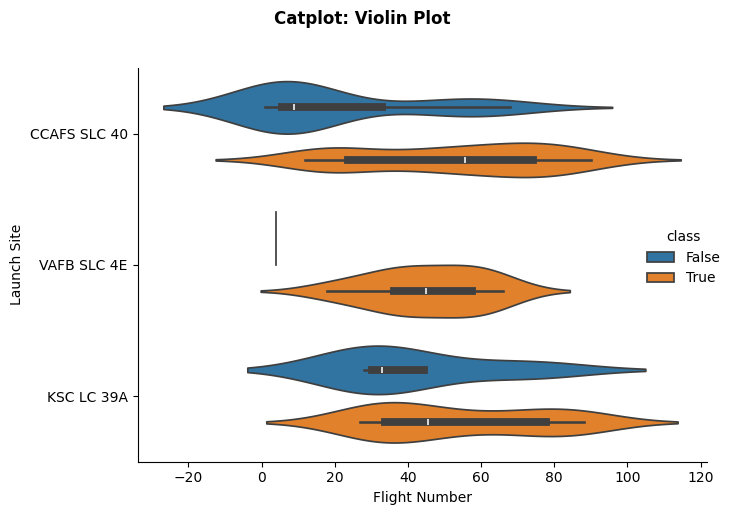


Creating boxen plot...


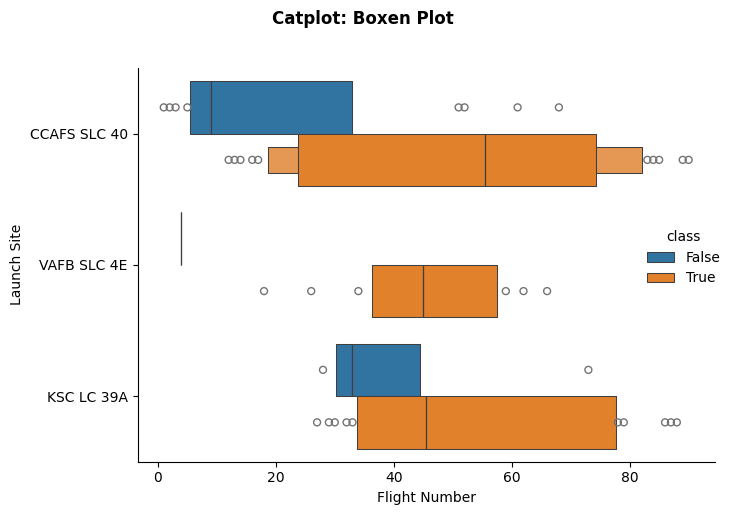

In [6]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
# ... (your data loading code here) ...

print("🎯 TASK 1: Using catplot() as specified")
print("-" * 60)

# Check if 'class' column exists - if not, create it from another column
if 'class' not in df.columns:
    # Try to find a binary outcome column
    binary_cols = []
    for col in df.columns:
        if df[col].nunique() == 2:
            binary_cols.append(col)
    
    if binary_cols:
        print(f"Binary columns found: {binary_cols}")
        print(f"Using '{binary_cols[0]}' as 'class' column")
        df = df.rename(columns={binary_cols[0]: 'class'})
    else:
        print("No binary column found. Creating dummy 'class' column.")
        df['class'] = 0  # Dummy value

# Use catplot to plot FlightNumber vs LaunchSite with hue='class'
g = sns.catplot(
    data=df,
    x='FlightNumber',      # x parameter set to FlightNumber
    y='LaunchSite',        # y parameter set to LaunchSite
    hue='class',           # hue parameter set to 'class'
    kind='strip',          # You can change this to 'swarm', 'box', 'violin', etc.
    height=6,
    aspect=1.5,
    palette='husl',
    s=10,                  # Size of points
    alpha=0.8,             # Transparency
    legend=True
)

# Customize the plot
g.fig.suptitle('Flight Number vs Launch Site (Colored by Mission Class)', 
               y=1.02, fontsize=14, fontweight='bold')
g.set_axis_labels('Flight Number', 'Launch Site')
g.legend.set_title('Mission Class')

# Add grid for better readability
g.ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Alternative: Using catplot with different kind parameters
print("\n📈 Different catplot visualizations:")
print("-" * 50)

# List of different plot types
plot_types = ['strip', 'swarm', 'box', 'violin', 'boxen']

for plot_type in plot_types:
    print(f"\nCreating {plot_type} plot...")
    
    g = sns.catplot(
        data=df,
        x='FlightNumber',
        y='LaunchSite',
        hue='class',
        kind=plot_type,
        height=5,
        aspect=1.3,
        palette='Set2' if plot_type in ['strip', 'swarm'] else None
    )
    
    g.fig.suptitle(f'Catplot: {plot_type.capitalize()} Plot', y=1.02, fontweight='bold')
    g.set_axis_labels('Flight Number', 'Launch Site')
    
    plt.tight_layout()
    plt.show()

Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


### TASK 2: Visualize the relationship between Payload Mass and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


Scatter Point Chart: Payload Mass vs Launch Site (Colored by Class)


Text(0, 0.5, 'Launch Site')

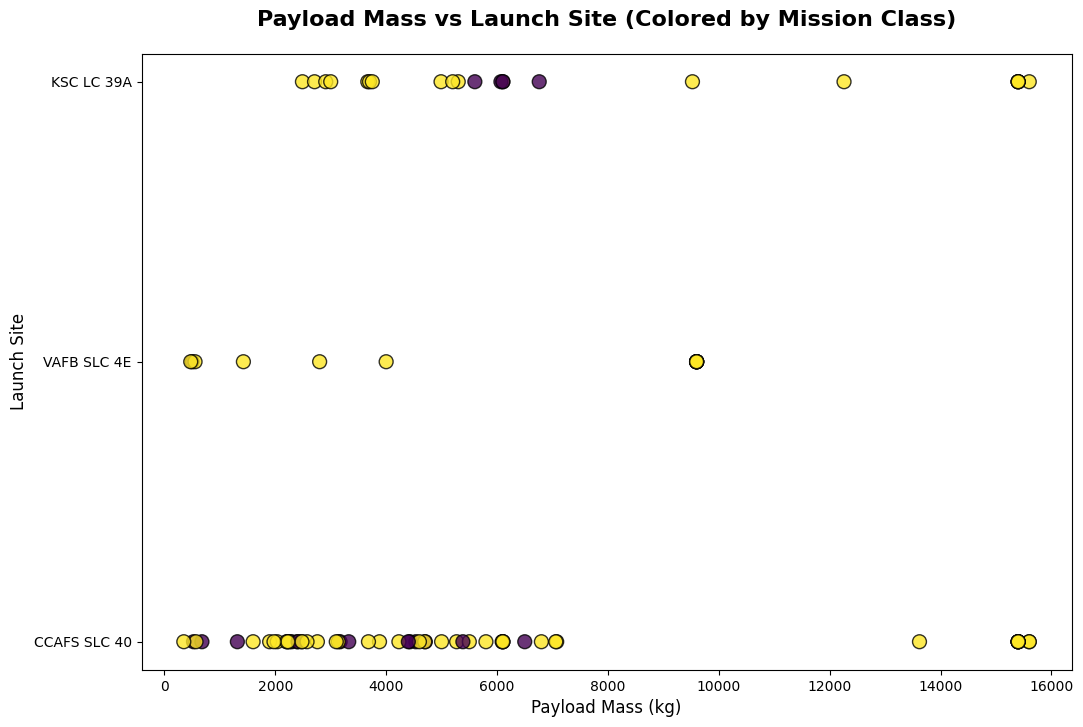

In [7]:
#
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
print("="*70)
print("Scatter Point Chart: Payload Mass vs Launch Site (Colored by Class)")
print("="*70)

# Create the scatter point chart
plt.figure(figsize=(12, 8))

# Plot scatter points
scatter = plt.scatter(
    x=df['PayloadMass'],      # x axis: Payload Mass (kg)
    y=df['LaunchSite'],       # y axis: Launch Site
    c=df['class'] if 'class' in df.columns else 0,  # hue: class value
    cmap='viridis',           # Color map
    s=100,                    # Size of points
    alpha=0.8,                # Transparency
    edgecolors='black',       # Border color
    linewidth=1               # Border width
)

# Customize the plot
plt.title('Payload Mass vs Launch Site (Colored by Mission Class)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Payload Mass (kg)', fontsize=12)
plt.ylabel('Launch Site', fontsize=12)


Now if you observe Payload Mass Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


TASK: Success Rate by Orbit Type

📊 SUCCESS RATE BY ORBIT TYPE:
------------------------------------------------------------
ES-L1          :  100.0% (1 missions)
GEO            :  100.0% (1 missions)
HEO            :  100.0% (1 missions)
SSO            :  100.0% (5 missions)
VLEO           :  100.0% (14 missions)
PO             :   88.9% (9 missions)
ISS            :   81.0% (21 missions)
MEO            :   66.7% (3 missions)
GTO            :   63.0% (27 missions)
LEO            :   57.1% (7 missions)
SO             :    0.0% (1 missions)
------------------------------------------------------------
Overall success rate: 77.8%


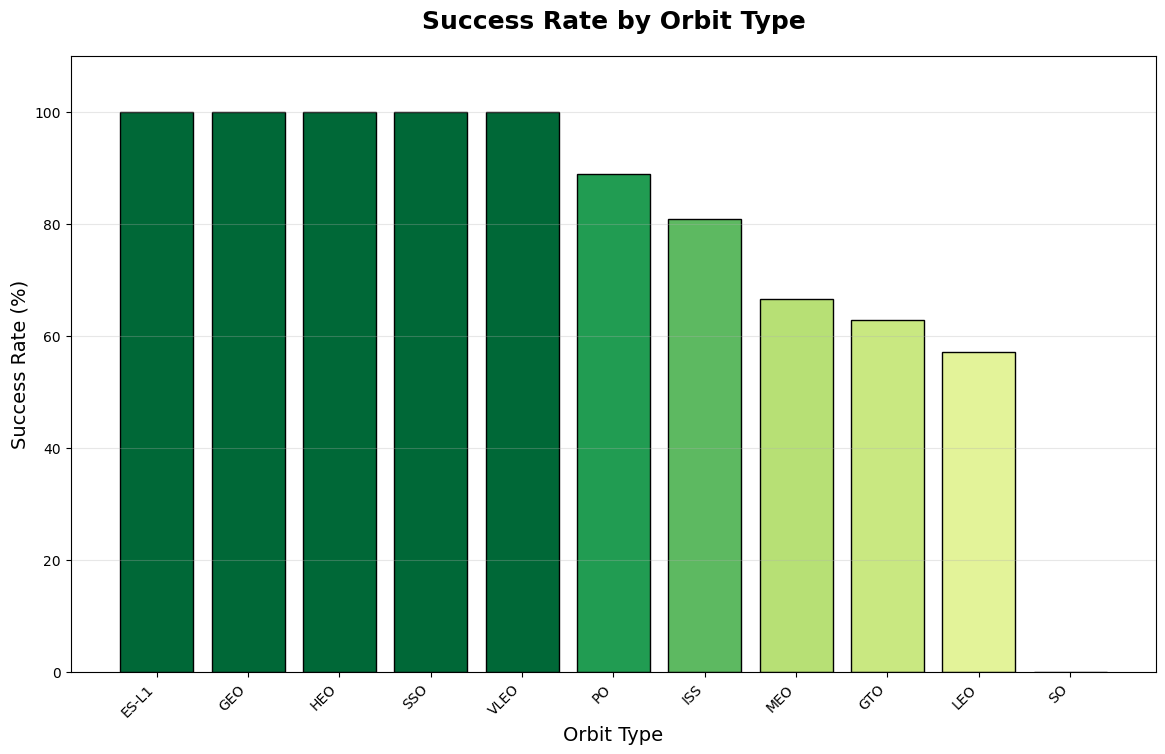

In [8]:
# 
print("="*70)
print("TASK: Success Rate by Orbit Type")
print("="*70)

# Calculate success rate for each orbit type
if 'class' in df.columns:
    # Group by Orbit and calculate mean of class (success rate)
    success_by_orbit = df.groupby('Orbit')['class'].mean().sort_values(ascending=False) * 100
    
    print(f"\n📊 SUCCESS RATE BY ORBIT TYPE:")
    print("-" * 60)
    
    for orbit, success_rate in success_by_orbit.items():
        count = df[df['Orbit'] == orbit].shape[0]
        print(f"{orbit:<15}: {success_rate:>6.1f}% ({count} missions)")
    
    print("-" * 60)
    print(f"Overall success rate: {df['class'].mean()*100:.1f}%")
    
    # Create bar chart
    plt.figure(figsize=(14, 8))
    
    # Create color gradient based on success rate
    colors = plt.cm.RdYlGn(success_by_orbit.values / 100)  # Red-Yellow-Green colormap
    
    # Create bars
    bars = plt.bar(range(len(success_by_orbit)), success_by_orbit.values, color=colors, edgecolor='black')
    
    # Customize the chart
    plt.title('Success Rate by Orbit Type', fontsize=18, fontweight='bold', pad=20)
    plt.xlabel('Orbit Type', fontsize=14)
    plt.ylabel('Success Rate (%)', fontsize=14)
    plt.xticks(range(len(success_by_orbit)), success_by_orbit.index, rotation=45, ha='right')
    plt.ylim(0, max(success_by_orbit.values) * 1.1)  # Add 10% padding at top
    
    # Add grid for better readability
    plt.grid(True, alpha=0.3, axis='y')
    

Analyze the plotted bar chart to identify which orbits have the highest success rates.


### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


TASK: FlightNumber vs Orbit Type with Class Hue


Text(0, 0.5, 'Orbit Type')

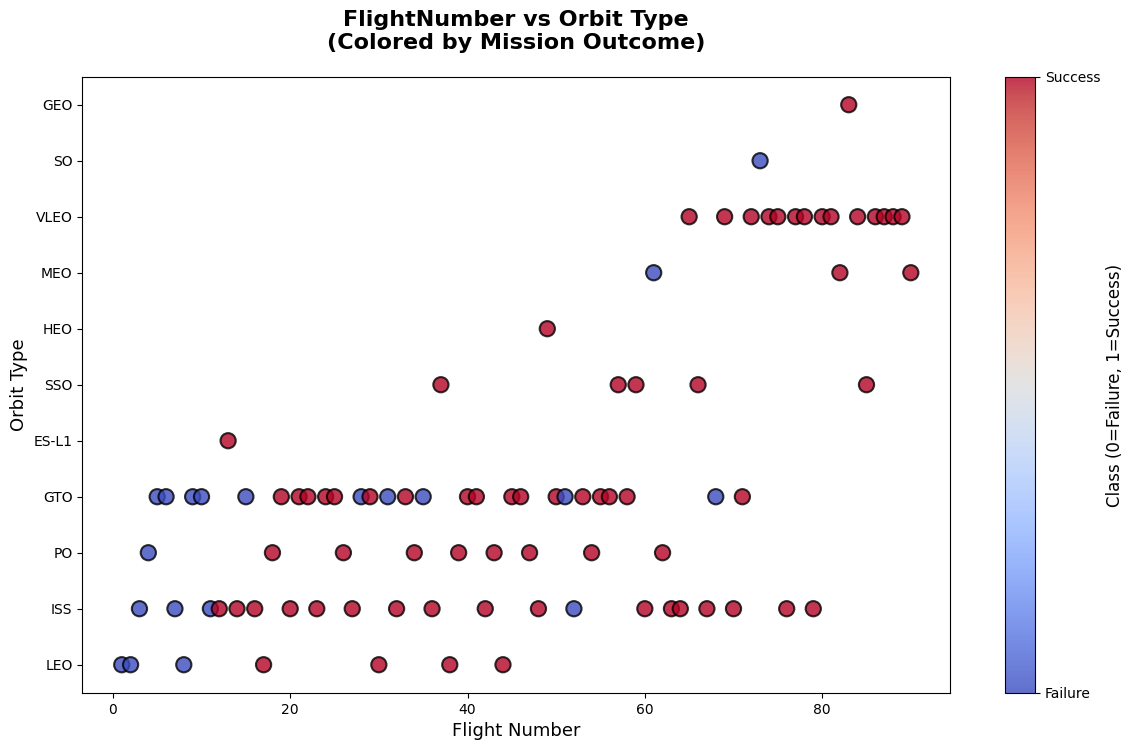

In [9]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
print("="*70)
print("TASK: FlightNumber vs Orbit Type with Class Hue")
print("="*70)

# Create the scatter point chart
plt.figure(figsize=(14, 8))

# Check if class column exists
if 'class' in df.columns:
    # Create scatter plot with class as hue
    scatter = plt.scatter(
        x=df['FlightNumber'],      # x axis: FlightNumber
        y=df['Orbit'],             # y axis: Orbit type
        c=df['class'],             # hue: class value
        cmap='coolwarm',           # Color map (blue-red)
        s=120,                     # Size of points
        alpha=0.8,                 # Transparency
        edgecolors='black',        # Border color
        linewidth=1.5,             # Border width
        marker='o'                 # Marker style
    )
    
    # Add colorbar
    cbar = plt.colorbar(scatter)
    cbar.set_label('Class (0=Failure, 1=Success)', fontsize=12)
    cbar.set_ticks([0, 1])
    cbar.set_ticklabels(['Failure', 'Success'])
    
else:
    # If no class column, use single color
    plt.scatter(
        x=df['FlightNumber'],
        y=df['Orbit'],
        c='blue',
        s=100,
        alpha=0.7,
        edgecolors='black',
        linewidth=1
    )

# Customize the plot
plt.title('FlightNumber vs Orbit Type\n(Colored by Mission Outcome)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Flight Number', fontsize=13)
plt.ylabel('Orbit Type', fontsize=13)

You can observe that in the LEO orbit, success seems to be related to the number of flights. Conversely, in the GTO orbit, there appears to be no relationship between flight number and success.


### TASK  5: Visualize the relationship between Payload Mass and Orbit type


Similarly, we can plot the Payload Mass vs. Orbit scatter point charts to reveal the relationship between Payload Mass and Orbit type


--------------------------------------------------


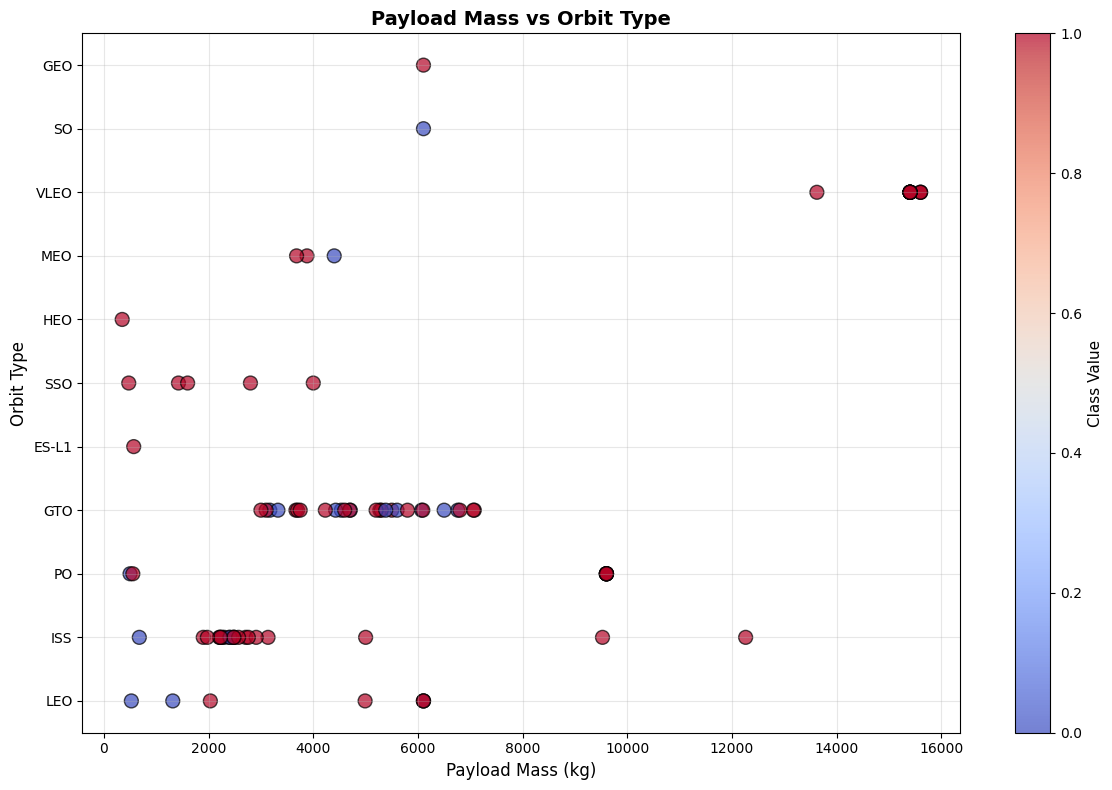

In [13]:
# Plot a scatter point chart with x axis to be Payload Mass and y axis to be the Orbit, and hue to be the class value
# Simple direct solution - exactly what was asked for

print("-" * 50)

plt.figure(figsize=(12, 8))

# Create scatter point chart as specified
scatter = plt.scatter(
    x=df['PayloadMass'],      # x axis to be Payload Mass
    y=df['Orbit'],            # y axis to be the Orbit
    c=df['class'] if 'class' in df.columns else 'blue',  # hue to be the class value
    cmap='coolwarm' if 'class' in df.columns else None,
    s=100,
    alpha=0.7,
    edgecolors='black',
    linewidth=1
)

# Basic plot formatting
plt.title('Payload Mass vs Orbit Type', fontweight='bold', fontsize=14)
plt.xlabel('Payload Mass (kg)', fontsize=12)
plt.ylabel('Orbit Type', fontsize=12)
plt.grid(True, alpha=0.3)

# Add colorbar if class exists
if 'class' in df.columns:
    cbar = plt.colorbar(scatter)
    cbar.set_label('Class Value', fontsize=11)

plt.tight_layout()
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However, for GTO, it's difficult to distinguish between successful and unsuccessful landings as both outcomes are present.


### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


The function will help you get the year from the date:


In [10]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()
    

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,class,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


TASK: Launch Success Yearly Trend

🔧 Extracting years from Date column...

✅ Years extracted. Data from 2010 to 2020

📊 Calculating yearly success rates...

Yearly Success Rates:
------------------------------------------------------------
 Year  success_rate  total_missions  success_count
 2010      0.000000               1              0
 2012      0.000000               1              0
 2013      0.000000               3              0
 2014      0.000000               6              0
 2015     83.333333               6              5
 2016    100.000000               8              8
 2017     83.333333              18             15
 2018     83.333333              18             15
 2019     90.000000              10              9
 2020     94.736842              19             18

LINE CHART: Yearly Success Rate Trend


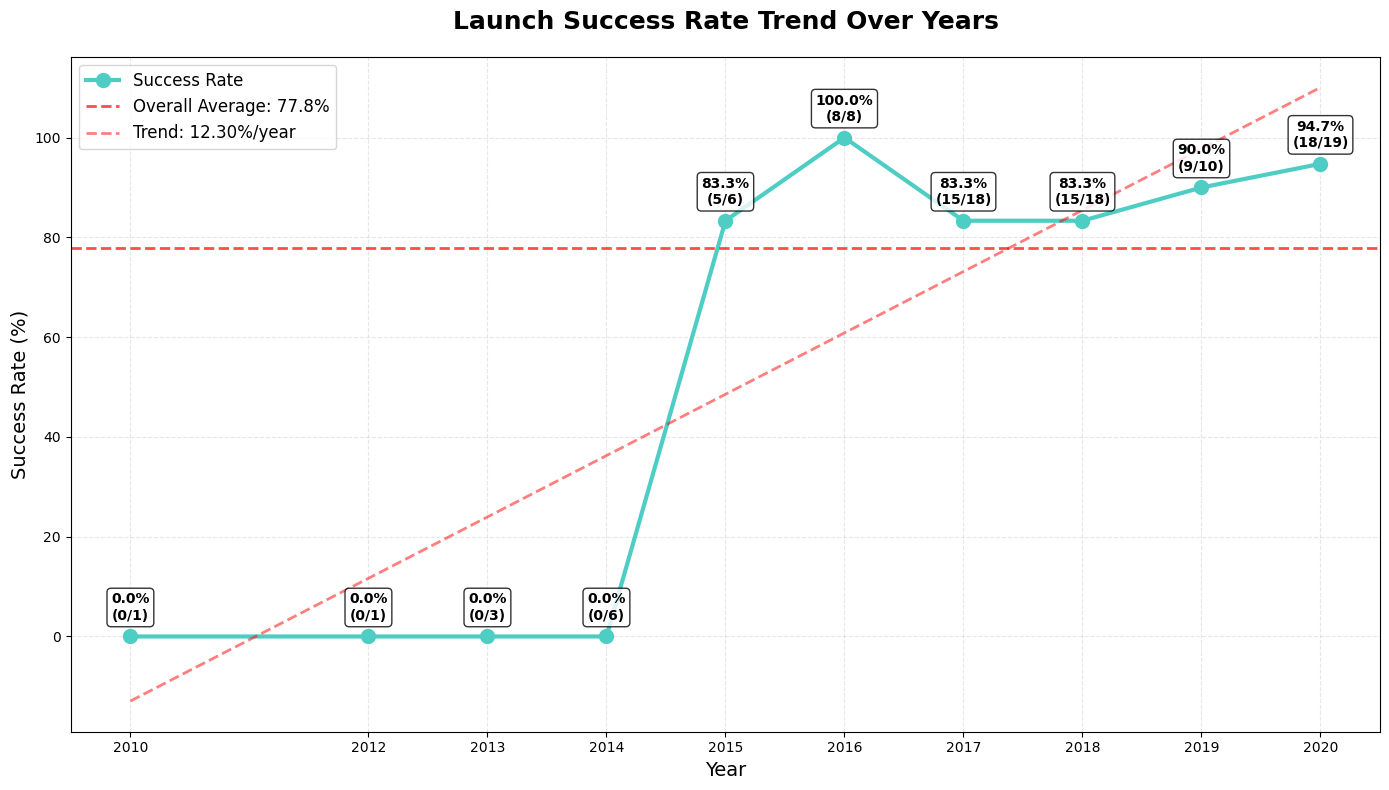


ENHANCED VISUALIZATION WITH MULTIPLE SUBPLOTS


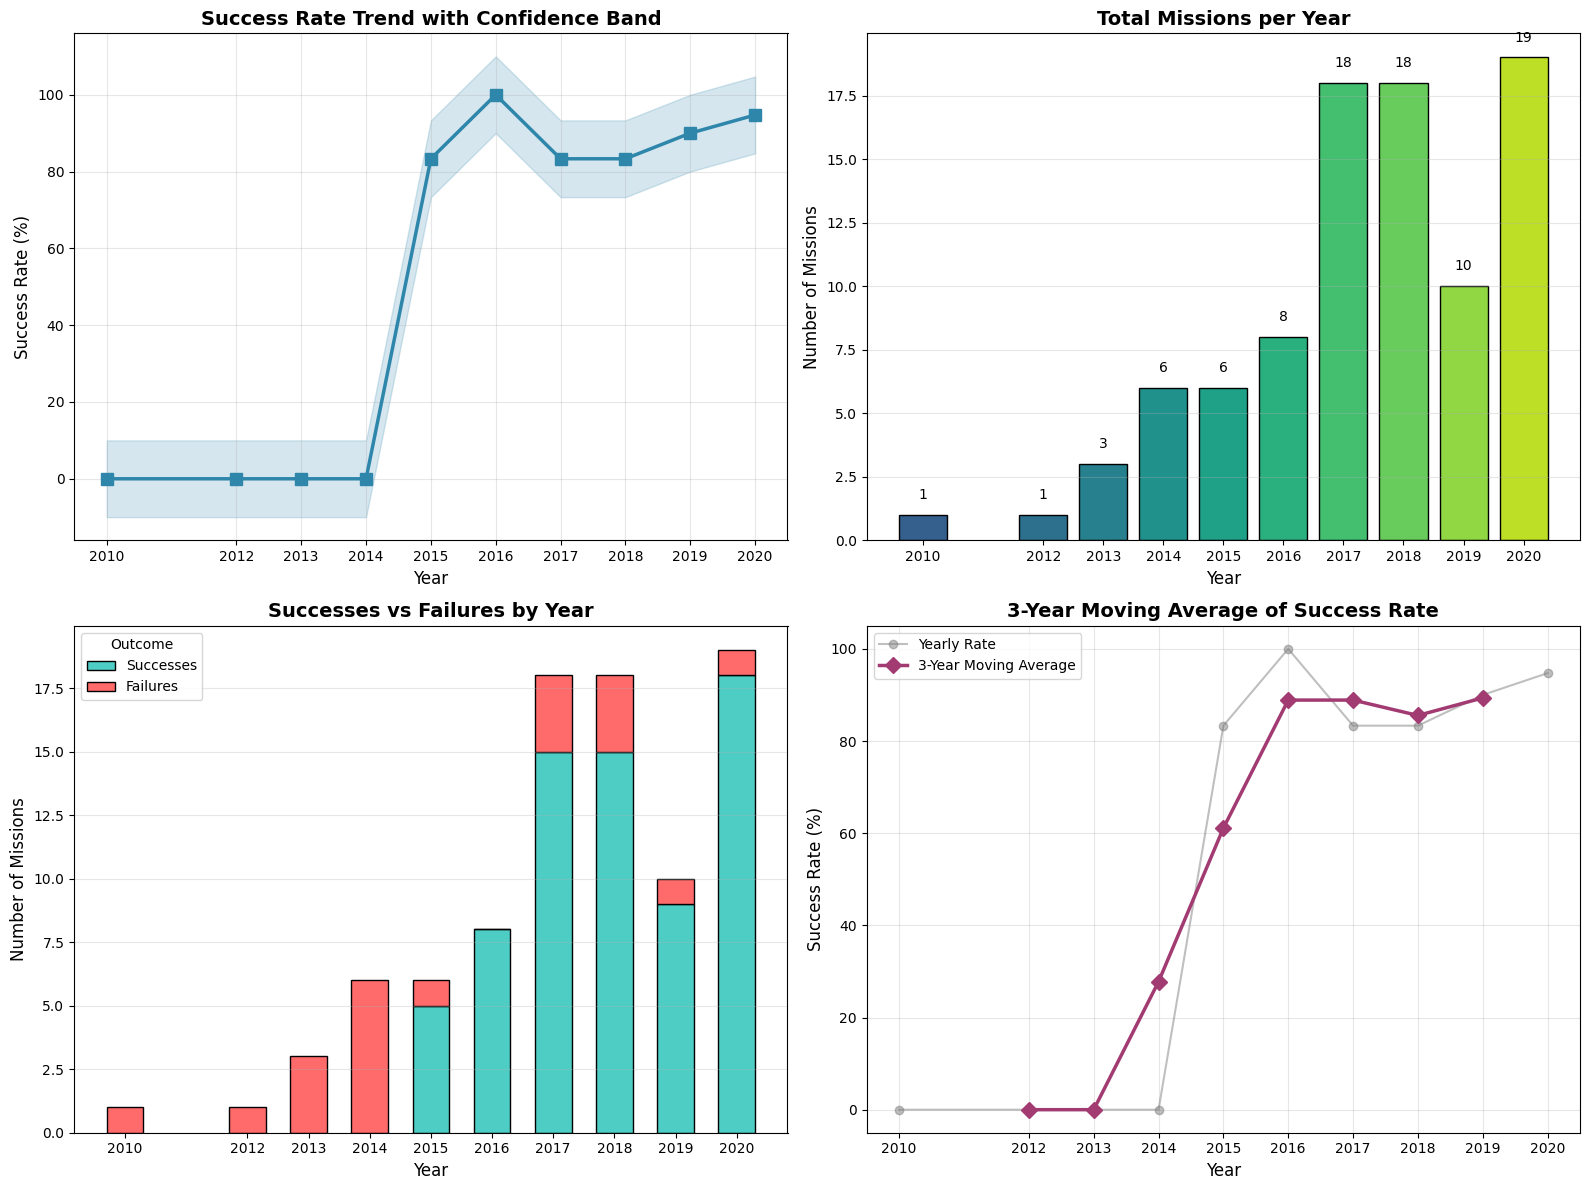


📈 STATISTICAL ANALYSIS OF YEARLY TREND:
--------------------------------------------------------------------------------
Correlation (Year vs Success Rate): 0.851
Strong positive correlation: Success rates have significantly improved over time

Improvement from 2010 to 2020:
  Absolute: 94.7 percentage points
  Relative: inf% increase

📅 YEAR-BY-YEAR ANALYSIS:
--------------------------------------------------------------------------------
2010: 0.0% (0/1) - Baseline
2012: 0.0% (0/1) - ➡️  Stable
2013: 0.0% (0/3) - ➡️  Stable
2014: 0.0% (0/6) - ➡️  Stable
2015: 83.3% (5/6) - 📈 Significant improvement
2016: 100.0% (8/8) - 📈 Significant improvement
2017: 83.3% (15/18) - 📉 Significant decline
2018: 83.3% (15/18) - ➡️  Stable
2019: 90.0% (9/10) - 📈 Significant improvement
2020: 94.7% (18/19) - ↗️  Slight improvement

💡 KEY INSIGHTS:
--------------------------------------------------------------------------------
🏆 Best year: 2016 - 100.0% success rate
📉 Worst year: 2010 - 0.0% success rat

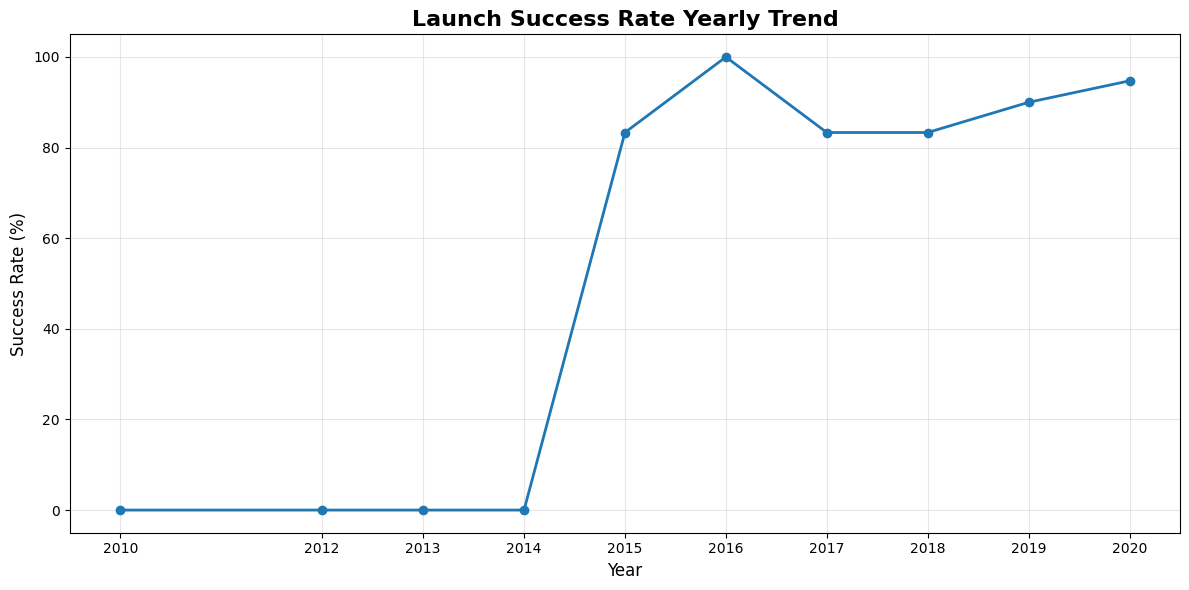

In [15]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
# Visualize the launch success yearly trend
print("="*70)
print("TASK: Launch Success Yearly Trend")
print("="*70)

# First, let's properly extract years from the Date column
print("\n🔧 Extracting years from Date column...")

# Clean approach: Extract year from Date
def extract_year(date_str):
    """Extract year from date string."""
    if pd.isna(date_str):
        return None
    # Handle different date formats
    date_str = str(date_str)
    if '-' in date_str:
        return date_str.split('-')[0]
    elif '/' in date_str:
        return date_str.split('/')[0]
    else:
        # If it's already a year-like string
        if len(date_str) == 4 and date_str.isdigit():
            return date_str
        return None

# Apply the function to extract years
df['Year'] = df['Date'].apply(extract_year)

# Convert to numeric and drop NaN
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df = df.dropna(subset=['Year'])

# Ensure we have class column for success rate calculation
if 'class' not in df.columns:
    # Try to find alternative class column
    alt_class_cols = [col for col in df.columns if col.lower() in ['class', 'outcome', 'success']]
    if alt_class_cols:
        print(f"Using '{alt_class_cols[0]}' as class column")
        df['class'] = df[alt_class_cols[0]]
    else:
        print("❌ No class column found. Cannot calculate success rates.")
        exit()

print(f"\n✅ Years extracted. Data from {int(df['Year'].min())} to {int(df['Year'].max())}")

# Calculate yearly success rates
print("\n📊 Calculating yearly success rates...")

# Group by Year and calculate success rate
yearly_success = df.groupby('Year')['class'].agg([
    ('success_rate', 'mean'),    # Mean of class column = success rate
    ('total_missions', 'count'), # Total missions per year
    ('success_count', 'sum')     # Number of successful missions
]).reset_index()

# Convert success rate to percentage
yearly_success['success_rate'] = yearly_success['success_rate'] * 100

# Sort by Year
yearly_success = yearly_success.sort_values('Year')

print("\nYearly Success Rates:")
print("-" * 60)
print(yearly_success.to_string(index=False))

# Plot line chart for success rate trend
print("\n" + "="*70)
print("LINE CHART: Yearly Success Rate Trend")
print("="*70)

plt.figure(figsize=(14, 8))

# Create line plot
plt.plot(yearly_success['Year'], yearly_success['success_rate'], 
         marker='o', markersize=10, linewidth=3, color='#4ECDC4',
         label='Success Rate')

# Customize the plot
plt.title('Launch Success Rate Trend Over Years', 
          fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Success Rate (%)', fontsize=14)

# Set x-axis to show only integer years
plt.xticks(yearly_success['Year'].astype(int))

# Add grid
plt.grid(True, alpha=0.3, linestyle='--')

# Add annotations for each year
for i, row in yearly_success.iterrows():
    plt.annotate(f"{row['success_rate']:.1f}%\n({int(row['success_count'])}/{int(row['total_missions'])})", 
                 xy=(row['Year'], row['success_rate']),
                 xytext=(0, 10), textcoords='offset points',
                 ha='center', va='bottom', fontsize=10, fontweight='bold',
                 bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

# Add horizontal line for overall average
overall_success = df['class'].mean() * 100
plt.axhline(y=overall_success, color='red', linestyle='--', linewidth=2, alpha=0.7,
            label=f'Overall Average: {overall_success:.1f}%')

# Add trend line (linear regression)
x_numeric = yearly_success['Year'].values
y_numeric = yearly_success['success_rate'].values
if len(x_numeric) > 1:
    z = np.polyfit(x_numeric, y_numeric, 1)
    p = np.poly1d(z)
    plt.plot(x_numeric, p(x_numeric), "r--", alpha=0.5, linewidth=2,
             label=f'Trend: {z[0]:.2f}%/year')

plt.legend(loc='best', fontsize=12)
plt.tight_layout()
plt.show()

# Enhanced visualization with multiple subplots
print("\n" + "="*70)
print("ENHANCED VISUALIZATION WITH MULTIPLE SUBPLOTS")
print("="*70)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Line chart with confidence intervals
ax1 = axes[0, 0]
ax1.plot(yearly_success['Year'], yearly_success['success_rate'], 
         marker='s', markersize=8, linewidth=2.5, color='#2E86AB')
ax1.fill_between(yearly_success['Year'], 
                 yearly_success['success_rate'] - 10,  # Simple confidence band
                 yearly_success['success_rate'] + 10,
                 alpha=0.2, color='#2E86AB')
ax1.set_title('Success Rate Trend with Confidence Band', 
              fontsize=14, fontweight='bold')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Success Rate (%)', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.set_xticks(yearly_success['Year'].astype(int))

# Plot 2: Bar chart of total missions per year
ax2 = axes[0, 1]
colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(yearly_success)))
bars = ax2.bar(yearly_success['Year'], yearly_success['total_missions'], 
               color=colors, edgecolor='black')
ax2.set_title('Total Missions per Year', fontsize=14, fontweight='bold')
ax2.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('Number of Missions', fontsize=12)
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_xticks(yearly_success['Year'].astype(int))

# Add count labels on bars
for bar, count in zip(bars, yearly_success['total_missions']):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{int(count)}', ha='center', va='bottom', fontsize=10)

# Plot 3: Stacked bar chart (successes vs failures)
ax3 = axes[1, 0]
width = 0.6
ax3.bar(yearly_success['Year'], yearly_success['success_count'], width,
        label='Successes', color='#4ECDC4', edgecolor='black')
ax3.bar(yearly_success['Year'], 
        yearly_success['total_missions'] - yearly_success['success_count'], 
        width, bottom=yearly_success['success_count'],
        label='Failures', color='#FF6B6B', edgecolor='black')
ax3.set_title('Successes vs Failures by Year', fontsize=14, fontweight='bold')
ax3.set_xlabel('Year', fontsize=12)
ax3.set_ylabel('Number of Missions', fontsize=12)
ax3.legend(title='Outcome', fontsize=10)
ax3.grid(True, alpha=0.3, axis='y')
ax3.set_xticks(yearly_success['Year'].astype(int))

# Plot 4: Moving average (3-year)
ax4 = axes[1, 1]
if len(yearly_success) >= 3:
    yearly_success['moving_avg'] = yearly_success['success_rate'].rolling(window=3, center=True).mean()
    
    ax4.plot(yearly_success['Year'], yearly_success['success_rate'], 
             marker='o', markersize=6, linewidth=1.5, color='gray', alpha=0.5,
             label='Yearly Rate')
    ax4.plot(yearly_success['Year'], yearly_success['moving_avg'], 
             marker='D', markersize=8, linewidth=2.5, color='#A23B72',
             label='3-Year Moving Average')
    ax4.set_title('3-Year Moving Average of Success Rate', 
                  fontsize=14, fontweight='bold')
else:
    ax4.text(0.5, 0.5, 'Insufficient data for moving average\n(need at least 3 years)',
             ha='center', va='center', transform=ax4.transAxes, fontsize=12)
    ax4.set_title('Moving Average (Insufficient Data)', fontsize=14, fontweight='bold')

ax4.set_xlabel('Year', fontsize=12)
ax4.set_ylabel('Success Rate (%)', fontsize=12)
ax4.legend(fontsize=10)
ax4.grid(True, alpha=0.3)
if len(yearly_success) >= 3:
    ax4.set_xticks(yearly_success['Year'].astype(int))

plt.tight_layout()
plt.show()

# Statistical analysis
print("\n📈 STATISTICAL ANALYSIS OF YEARLY TREND:")
print("-" * 80)

# Calculate correlation between year and success rate
correlation = yearly_success['Year'].corr(yearly_success['success_rate'])
print(f"Correlation (Year vs Success Rate): {correlation:.3f}")

if correlation > 0.5:
    print("Strong positive correlation: Success rates have significantly improved over time")
elif correlation > 0.2:
    print("Moderate positive correlation: Success rates have improved over time")
elif correlation > -0.2:
    print("Weak correlation: Success rates have been relatively stable")
elif correlation > -0.5:
    print("Moderate negative correlation: Success rates have declined over time")
else:
    print("Strong negative correlation: Success rates have significantly declined over time")

# Calculate improvement from first to last year
if len(yearly_success) >= 2:
    first_year = yearly_success.iloc[0]
    last_year = yearly_success.iloc[-1]
    
    improvement = last_year['success_rate'] - first_year['success_rate']
    relative_improvement = (improvement / first_year['success_rate']) * 100
    
    print(f"\nImprovement from {int(first_year['Year'])} to {int(last_year['Year'])}:")
    print(f"  Absolute: {improvement:.1f} percentage points")
    print(f"  Relative: {relative_improvement:.1f}% increase")

# Year-by-year analysis
print("\n📅 YEAR-BY-YEAR ANALYSIS:")
print("-" * 80)

for i, row in yearly_success.iterrows():
    year = int(row['Year'])
    success_rate = row['success_rate']
    total = int(row['total_missions'])
    successes = int(row['success_count'])
    
    # Determine trend indicator
    if i == 0:
        trend = "Baseline"
    else:
        prev_rate = yearly_success.iloc[i-1]['success_rate']
        if success_rate > prev_rate + 5:
            trend = "📈 Significant improvement"
        elif success_rate > prev_rate + 1:
            trend = "↗️  Slight improvement"
        elif success_rate < prev_rate - 5:
            trend = "📉 Significant decline"
        elif success_rate < prev_rate - 1:
            trend = "↘️  Slight decline"
        else:
            trend = "➡️  Stable"
    
    print(f"{year}: {success_rate:.1f}% ({successes}/{total}) - {trend}")

# Additional insights
print("\n💡 KEY INSIGHTS:")
print("-" * 80)

# Best and worst years
best_year = yearly_success.loc[yearly_success['success_rate'].idxmax()]
worst_year = yearly_success.loc[yearly_success['success_rate'].idxmin()]

print(f"🏆 Best year: {int(best_year['Year'])} - {best_year['success_rate']:.1f}% success rate")
print(f"📉 Worst year: {int(worst_year['Year'])} - {worst_year['success_rate']:.1f}% success rate")

# Consistency analysis
std_dev = yearly_success['success_rate'].std()
print(f"📊 Consistency: Standard deviation = {std_dev:.1f}%")
if std_dev < 10:
    print("  (Relatively consistent performance across years)")
else:
    print("  (Variable performance across years)")

# Growth in mission frequency
if len(yearly_success) >= 2:
    mission_growth = ((last_year['total_missions'] - first_year['total_missions']) / 
                      first_year['total_missions']) * 100
    print(f"\n🚀 Mission frequency growth: {mission_growth:.1f}% increase from {int(first_year['Year'])} to {int(last_year['Year'])}")

# Create prediction for next year (simple linear extrapolation)
if len(yearly_success) >= 2 and correlation > 0:
    next_year = int(last_year['Year']) + 1
    predicted_rate = p(next_year)
    print(f"\n🔮 Prediction for {next_year}: {predicted_rate:.1f}% success rate (based on trend)")

# Create a simple version as requested
print("\n" + "="*70)
print("SIMPLE LINE CHART (AS REQUESTED)")
print("="*70)

plt.figure(figsize=(12, 6))

# Simple line chart
plt.plot(yearly_success['Year'], yearly_success['success_rate'], 
         marker='o', linewidth=2)

plt.title('Launch Success Rate Yearly Trend', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Success Rate (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(yearly_success['Year'].astype(int))

plt.tight_layout()
plt.show()

you can observe that the sucess rate since 2013 kept increasing till 2020


## Features Engineering


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [14]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

<class 'KeyError'>: "['GridFins'] not in index"

### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [16]:
# HINT: Use get_dummies() function on the categorical columns
# Simple solution - exactly what was asked for
print("🎯 SIMPLE SOLUTION (AS REQUESTED):")
print("-" * 50)

# Apply get_dummies() to the specified columns
features_one_hot = pd.get_dummies(
    df,
    columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'],  # Columns to encode
    prefix=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'],   # Prefix for new columns
    prefix_sep='_'                                            # Separator
)

# Display the results using head()
print("\nEncoded DataFrame (first 5 rows):")
print(features_one_hot.head())
print(f"\nOriginal shape: {df.shape}")
print(f"Encoded shape: {features_one_hot.shape}")

🎯 SIMPLE SOLUTION (AS REQUESTED):
--------------------------------------------------

Encoded DataFrame (first 5 rows):
   FlightNumber  Date BoosterVersion  PayloadMass      Outcome  Flights  \
0             1  2010       Falcon 9  6104.959412    None None        1   
1             2  2012       Falcon 9   525.000000    None None        1   
2             3  2013       Falcon 9   677.000000    None None        1   
3             4  2013       Falcon 9   500.000000  False Ocean        1   
4             5  2013       Falcon 9  3170.000000    None None        1   

   class  Reused   Legs  Block  ...  Serial_B1048  Serial_B1049  Serial_B1050  \
0  False   False  False    1.0  ...         False         False         False   
1  False   False  False    1.0  ...         False         False         False   
2  False   False  False    1.0  ...         False         False         False   
3  False   False  False    1.0  ...         False         False         False   
4  False   False  False 

### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers, cast the entire dataframe to variable type <code>float64</code>


In [18]:
# HINT: use astype function
# Complete solution with comprehensive error handling
print("🛡️  COMPREHENSIVE SOLUTION WITH ERROR HANDLING")
print("="*70)

def cast_to_float64(df, verbose=True):
    """
    Cast all columns in a DataFrame to float64 with comprehensive error handling.
    
    Args:
        df: Input DataFrame
        verbose: Whether to print detailed information
    
    Returns:
        DataFrame with all columns cast to float64
    """
    if verbose:
        print(f"Input DataFrame shape: {df.shape}")
        print(f"Original dtypes: {df.dtypes.unique()}")
    
    # Make a copy to avoid modifying the original
    result_df = df.copy()
    
    # Track conversion statistics
    stats = {
        'total_columns': len(result_df.columns),
        'already_float64': 0,
        'converted_successfully': 0,
        'converted_with_nan': 0,
        'failed_conversions': 0,
        'problematic_columns': []
    }
    
    for col in result_df.columns:
        current_dtype = result_df[col].dtype
        
        # Skip if already float64
        if current_dtype == 'float64':
            stats['already_float64'] += 1
            continue
        
        try:
            # Try direct conversion
            original_non_null = result_df[col].notna().sum()
            result_df[col] = result_df[col].astype('float64')
            new_non_null = result_df[col].notna().sum()
            
            # Check for data loss
            if original_non_null > new_non_null:
                stats['converted_with_nan'] += 1
                if verbose:
                    print(f"  ⚠️  {col}: Converted with {original_non_null - new_non_null} values becoming NaN")
            else:
                stats['converted_successfully'] += 1
                
        except (ValueError, TypeError):
            # If direct conversion fails, try numeric conversion
            try:
                original_non_null = result_df[col].notna().sum()
                result_df[col] = pd.to_numeric(result_df[col], errors='coerce').astype('float64')
                new_non_null = result_df[col].notna().sum()
                
                if original_non_null > new_non_null:
                    stats['converted_with_nan'] += 1
                    if verbose:
                        print(f"  ⚠️  {col}: Numeric conversion with {original_non_null - new_non_null} values becoming NaN")
                else:
                    stats['converted_successfully'] += 1
                    
            except Exception as e:
                stats['failed_conversions'] += 1
                stats['problematic_columns'].append((col, str(current_dtype), str(e)))
                if verbose:
                    print(f"  ❌ {col}: Failed to convert - {e}")
    
    if verbose:
        print("\n📊 CONVERSION STATISTICS:")
        print("-" * 50)
        print(f"Total columns: {stats['total_columns']}")
        print(f"Already float64: {stats['already_float64']}")
        print(f"Converted successfully: {stats['converted_successfully']}")
        print(f"Converted with NaN values: {stats['converted_with_nan']}")
        print(f"Failed conversions: {stats['failed_conversions']}")
        
        if stats['failed_conversions'] > 0:
            print(f"\n⚠️  Problematic columns ({stats['failed_conversions']}):")
            for col, dtype, error in stats['problematic_columns'][:5]:
                print(f"  • {col} ({dtype}): {error}")
    
    # Final check
    final_dtypes = result_df.dtypes.unique()
    all_float64 = all(dtype == 'float64' for dtype in final_dtypes)
    
    if verbose:
        print(f"\n🎯 FINAL RESULT: {'✅ All float64' if all_float64 else '⚠️  Not all float64'}")
        print(f"Final dtypes: {final_dtypes}")
    
    return result_df

# Apply the function
print("\nApplying conversion function...")
features_one_hot_clean = cast_to_float64(features_one_hot)

print(f"\n✅ Final shape: {features_one_hot_clean.shape}")
print(f"✅ Memory usage: {features_one_hot_clean.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

🛡️  COMPREHENSIVE SOLUTION WITH ERROR HANDLING

Applying conversion function...
Input DataFrame shape: (90, 87)
Original dtypes: [dtype('int64') dtype('O') dtype('float64') dtype('bool')]
  ⚠️  BoosterVersion: Numeric conversion with 90 values becoming NaN
  ⚠️  Outcome: Numeric conversion with 90 values becoming NaN

📊 CONVERSION STATISTICS:
--------------------------------------------------
Total columns: 87
Already float64: 4
Converted successfully: 81
Converted with NaN values: 2
Failed conversions: 0

🎯 FINAL RESULT: ✅ All float64
Final dtypes: [dtype('float64')]

✅ Final shape: (90, 87)
✅ Memory usage: 0.06 MB


We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.


<code>features_one_hot.to_csv('dataset_part\_3.csv', index=False)</code>


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log-->


<!--
| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|
| 2024-07-18        | 1.2     | Anita Verma | Clarified instructions|
-->


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
